In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [ ]:
# Matriks tridiagonal
def tridag(a,b,c,u,n,ng):
    temp=b[0]
    u[0]=u[0]/temp
    for j in range(1,n):
        temp1 = b[j]
        b[j]  = c/temp
        temp  = temp1-a*b[j]
        u[j]  = (u[j]-a*u[j-1])/temp
    for j in range (n-2,-1,-1):
        u[j]  = u[j]-b[j+1]*u[j+1]
    return u

# rumus filter untuk potensial 1 dimensi
def filter1D(dx,vpot,psi,energy,n,k):
    dx2 = dx*dx
    a = -0.5/dx2
    c = a
    odx2 = 1/dx2
    b=np.zeros(n)
    #k adalah jumlah perulangan filter
    for k in range(0,5):
        for i in range(0,n):
            b[i] = (odx2+vpot[i]-energy)
        global tridag
        psi = tridag(a,b,c,psi,n,n)
    fnorm = sum(psi*psi)*dx
    psi = psi / (fnorm**0.5)
    return psi

# rumusan hamiltonian
def hamiltonian(dx,vpot,psi,ng):
    dx2 = dx*dx
    a =-0.5/dx2
    c = a
    odx = 1/dx2
    u = np.zeros(ng)
    u[0] =((odx+vpot[0])*psi[0] + c*psi[1])
    for i in range (1,ng-1):
        u[i] = (a*psi[i-1]+(odx+vpot[i])*psi[i]+c*psi[i+1])
    u[-1]=((a*psi[-2])+(odx+vpot[-1])*psi[-1])
    psiu = psi*u
    energy_new = sum(psiu)*dx
    return energy_new

# Rumusan eigenstate
def eigenState(x, ngrid, vpot, initE, dx):
    if initE <= 0 :
        initE = initE + 1e-12
    x_tart = x[0]
    x_end = x[ngrid - 1]
    psi = np.zeros(ngrid)
    if x_tart < 0:
        for i in range(0,ngrid):
            psi[i] = (np.sin(x[i]) + np.cos(x[i]))
    else:
        for i in range(0,ngrid):
           psi[i] = 1 + x[i] / x_end
    #psi=np.linspace(1,1,ngrid) + x/x[-1]
    energy = initE
    error = 1e3
    loop = 1
    while error>1e-10:
        nloop = 10
        if loop ==1:
            nloop = 10 #nloop
        global filter1D
        global hamiltonian
        psi = filter1D(dx,vpot,psi,energy,ngrid,nloop)
        energy_new =  hamiltonian(dx,vpot,psi,ngrid)
        error = abs(energy_new-energy)#/energy
        energy = energy_new
        loop = loop+1
    output = [energy_new,psi]
    return output

<function matplotlib.pyplot.show(close=None, block=None)>

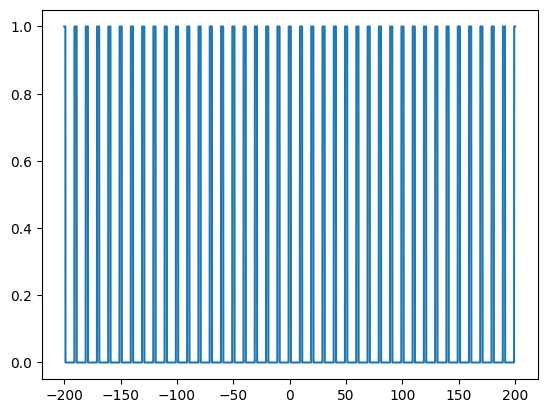

In [ ]:
#set sumur potensial, a=0,5
xmin = -200
xmax = 200
ngrid = 10000
r = np.linspace(xmin, xmax, ngrid)
dx = r[1]-r[0]
#a = 4
#b = 1
#c = 2
V = 1
a = 8
L1 = a+2
v0 = 0
#x = np.zeros (ngrid)
#ngrid = 10**4
#leb = xmax-xmin
#ngrid = int(leb/dx)
x = np.zeros (len(r))
v1 = np.zeros(len(r))
for i in range(0, len(r)):
 x[i] = xmin + ((i) * dx)
 for i in range(len(r)):
  ss = r[i]%L1
  if ss < (L1/2 - a/2) or ss > (L1/2 + a/2):
    v1[i]=V
  else:
    v1[i]=0
 #vpot[i] = a**2 - c**2 - a**2*(np.cos(b*x[i]))**2 - 2j*a*c*np.sin(b*x[i])
plt.plot(x,v1)
#plt.xlim([95,105])
plt.show

In [ ]:
step = 3000

In [ ]:
Einit = np.linspace(0,1,step)
En1 = np.zeros(step)
for i in range(step):
  E, psi = eigenState(r, ngrid, v1 , Einit[i], dx)
  En1[i] = E

In [ ]:
En1.sort()

In [ ]:
def k(fg):
    global step
    k1 = np.zeros(step)
    gr = np.gradient(abs(fg))
    lembah = 0
    peak = 0
    idx_l = []
    idx_p = []
    for i in range (len(gr)-1):
        if gr[i]<0 and  gr[i+1]>0 :
            idx_l.append(i)
            lembah += 1
    for i in range (len(gr)-1):
        if gr[i]>0 and  gr[i+1]<0 :
            idx_p.append(i)
            peak += 1

    psi_min = np.zeros(len(idx_l))
    for i in range(len(idx_l)):
      psi_min[i] = abs((fg[idx_l[i]]))

    m = 1
    for i in range(0,len(idx_l)):
      if psi_min[i] < 0.01:
        m += 1

    if peak < m + 2:
      m = peak

    lmbda_bar = 400/(m/2)

    k1 = 2*np.pi/lmbda_bar

    return k1

In [ ]:
list_k1 = np.zeros(len(En1))
psin = np.zeros((step,ngrid))

In [ ]:
for i in range(len(En1)):
    E, psi1 = eigenState(r, ngrid, v1, En1[i], dx)
    list_k1[i] = k(psi1)
    psin[i] = psi1

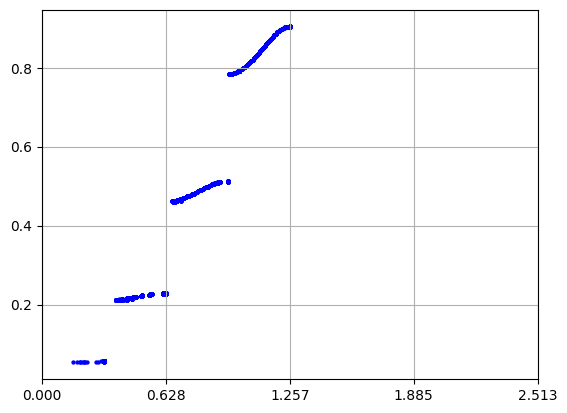

In [ ]:
plt.scatter(list_k1,En1, s=4.5, marker='o',color='b')
plt.xticks(np.arange(0, 3, np.pi/5))
plt.grid()

(0.0, 0.001)

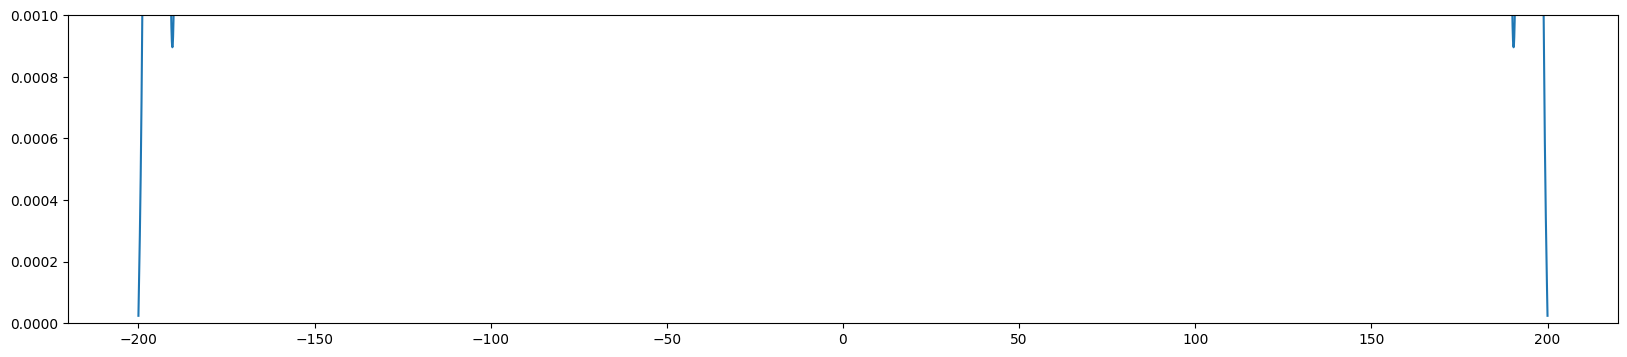

In [ ]:
e1, fg = eigenState(r, ngrid, v1, En1[0], dx)
plt.figure(figsize=(20, 4))
plt.plot(r,abs(fg))
plt.ylim(0,0.001)

In [ ]:
def shift(list_k):
  k_val = np.zeros(len(list_k1))
  for i in range(len(list_k1)):
    l = np.pi/L1
    K = list_k1[i]
    if int(K/l) % 2 == 0:
      K = K - int(K/l)*l
    else:
      K = K - int(K/l)*l
      K = l - K
    k_val[i] = K
  return k_val

k_manual1 = shift(list_k1)

In [ ]:
#set sumur potensial, a=0,5
xmin = -220
xmax = 220
ngrid = 10000
r = np.linspace(xmin, xmax, ngrid)
dx = r[1]-r[0]
#a = 4
#b = 1
#c = 2
V = 1
a = 8
L2 = a+3
v0 = 0
#x = np.zeros (ngrid)
#ngrid = 10**4
#leb = xmax-xmin
#ngrid = int(leb/dx)
x = np.zeros (len(r))
v2 = np.zeros(len(r))
for i in range(0, len(r)):
 x[i] = xmin + ((i) * dx)
 for i in range(len(r)):
  ss = r[i]%L2
  if ss < (L2/2 - a/2) or ss > (L2/2 + a/2):
    v2[i]=V
  else:
    v2[i]=0
 #vpot[i] = a**2 - c**2 - a**2*(np.cos(b*x[i]))**2 - 2j*a*c*np.sin(b*x[i])
plt.plot(x,v2)
#plt.xlim([95,105])
plt.show

In [ ]:
step = 2000

In [ ]:
Einit = np.linspace(0,2,step)
En2 = np.zeros(step)
for i in range(step):
  E, psi = eigenState(r, ngrid, v2 , Einit[i], dx)
  En2[i] = E

In [ ]:
En2.sort()

In [ ]:
def k(fg):
    global step
    k2 = np.zeros(step)
    gr = np.gradient(abs(fg))
    lembah = 0
    peak = 0
    idx_l = []
    idx_p = []
    for i in range (len(gr)-1):
        if gr[i]<0 and  gr[i+1]>0 :
            idx_l.append(i)
            lembah += 1
    for i in range (len(gr)-1):
        if gr[i]>0 and  gr[i+1]<0 :
            idx_p.append(i)
            peak += 1

    psi_min = np.zeros(len(idx_l))
    for i in range(len(idx_l)):
      psi_min[i] = abs((fg[idx_l[i]]))

    m = 1
    for i in range(0,len(idx_l)):
      if psi_min[i] < 0.01:
        m += 1

    if peak < m + 2:
      m = peak

    lmbda_bar = 440/(m/2)

    k2 = 2*np.pi/lmbda_bar

    return k2

In [ ]:
list_k2 = np.zeros(len(En2))
psin = np.zeros((step,ngrid))

In [ ]:
for i in range(len(En2)):
    E, psi1 = eigenState(r, ngrid, v2, En2[i], dx)
    list_k2[i] = k(psi1)
    psin[i] = psi1

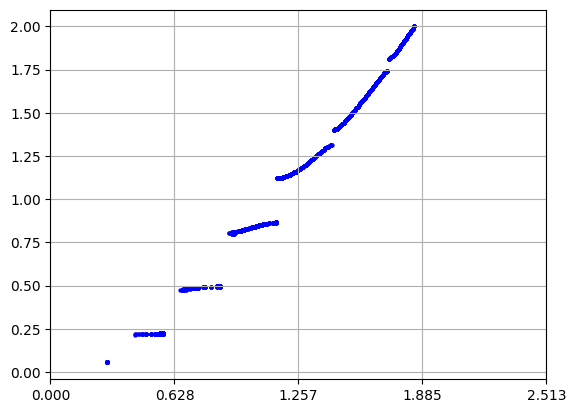

In [ ]:
plt.scatter(list_k2,En2, s=4.5, marker='o',color='b')
plt.xticks(np.arange(0, 3, np.pi/5))
plt.grid()

(0.0, 0.01)

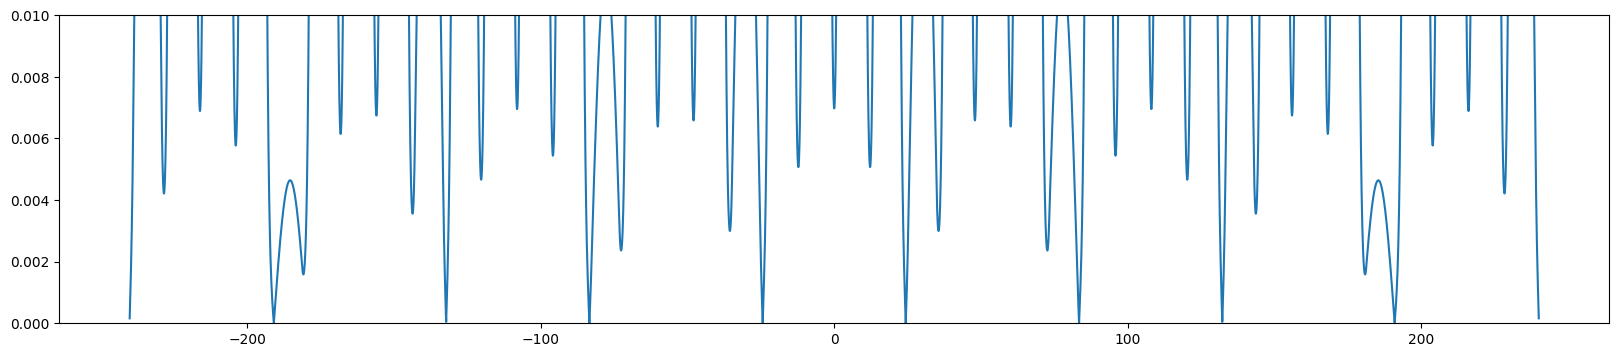

In [ ]:
e1, fg = eigenState(r, ngrid, v1, En1[0], dx)
plt.figure(figsize=(20, 4))
plt.plot(r,abs(fg))
plt.ylim(0,0.01)

In [ ]:
def shift(list_k):
  k_val = np.zeros(len(list_k2))
  for i in range(len(list_k2)):
    l = np.pi/L2
    K = list_k2[i]
    if int(K/l) % 2 == 0:
      K = K - int(K/l)*l
    else:
      K = K - int(K/l)*l
      K = l - K
    k_val[i] = K
  return k_val

k_manual2 = shift(list_k2)

<function matplotlib.pyplot.show(close=None, block=None)>

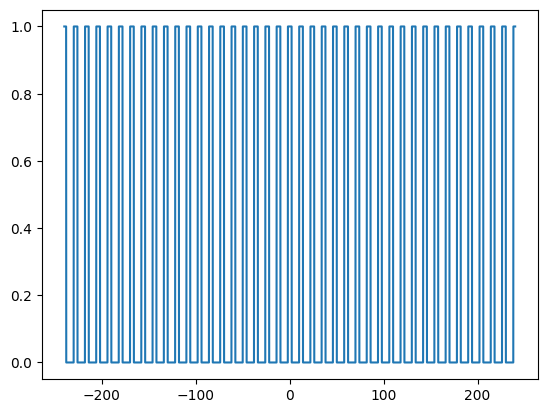

In [ ]:
#set sumur potensial, a=0,5
xmin = -240
xmax = 240
ngrid = 10000
r = np.linspace(xmin, xmax, ngrid)
dx = r[1]-r[0]
#a = 4
#b = 1
#c = 2
V = 1
a = 8
L3 = a+4
v0 = 0
#x = np.zeros (ngrid)
#ngrid = 10**4
#leb = xmax-xmin
#ngrid = int(leb/dx)
x = np.zeros (len(r))
v3 = np.zeros(len(r))
for i in range(0, len(r)):
 x[i] = xmin + ((i) * dx)
 for i in range(len(r)):
  ss = r[i]%L3
  if ss < (L3/2 - a/2) or ss > (L3/2 + a/2):
    v3[i]=V
  else:
    v3[i]=0
 #vpot[i] = a**2 - c**2 - a**2*(np.cos(b*x[i]))**2 - 2j*a*c*np.sin(b*x[i])
plt.plot(x,v3)
#plt.xlim([95,105])
plt.show

In [ ]:
step = 2000

In [ ]:
Einit3 = np.linspace(0,2,step)
En3 = np.zeros(step)
for i in range(step):
  E, psi = eigenState(r, ngrid, v3 , Einit3[i], dx)
  En3[i] = E

In [ ]:
En3.sort()

In [ ]:
def k(fg):
    global step
    k3 = np.zeros(step)
    gr = np.gradient(abs(fg))
    lembah = 0
    peak = 0
    idx_l = []
    idx_p = []
    for i in range (len(gr)-1):
        if gr[i]<0 and  gr[i+1]>0 :
            idx_l.append(i)
            lembah += 1
    for i in range (len(gr)-1):
        if gr[i]>0 and  gr[i+1]<0 :
            idx_p.append(i)
            peak += 1

    psi_min = np.zeros(len(idx_l))
    for i in range(len(idx_l)):
      psi_min[i] = abs((fg[idx_l[i]]))

    m = 1
    for i in range(0,len(idx_l)):
      if psi_min[i] < 0.01:
        m += 1

    if peak < m + 2:
      m = peak

    lmbda_bar = 480/(m/2)

    k3 = 2*np.pi/lmbda_bar

    return k3

In [ ]:
list_k3 = np.zeros(len(En3))
psin = np.zeros((step,ngrid))

In [ ]:
for i in range(len(En3)):
    E, psi1 = eigenState(r, ngrid, v3, En3[i], dx)
    list_k3[i] = k(psi1)
    psin[i] = psi1

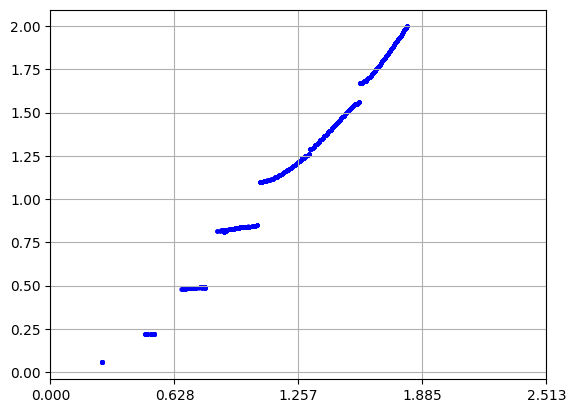

In [ ]:
plt.scatter(list_k3,En3, s=4.5, marker='o',color='b')
plt.xticks(np.arange(0, 3, np.pi/5))
plt.grid()

(0.0, 0.1)

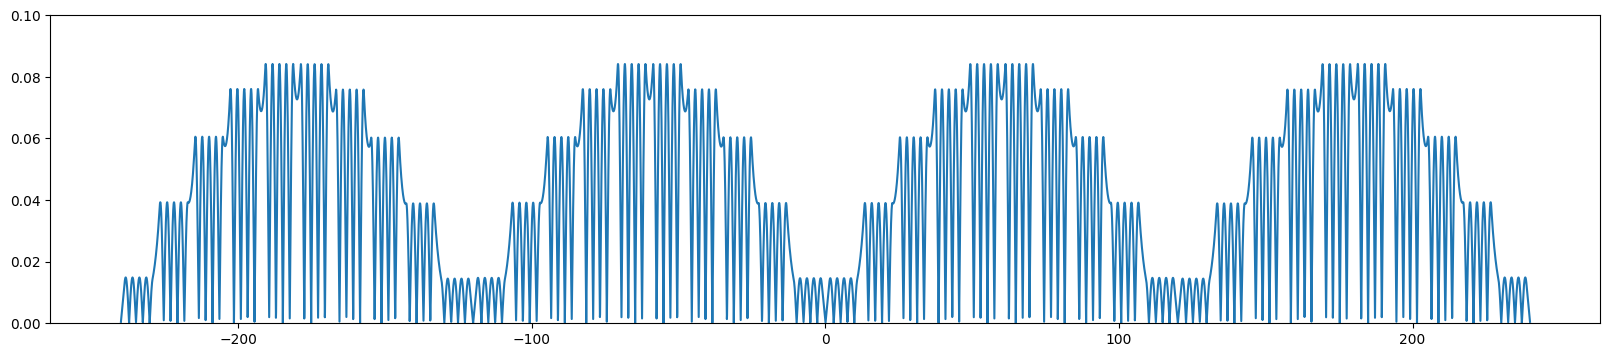

In [ ]:
e1, fg = eigenState(r, ngrid, v1, En1[1000], dx)
plt.figure(figsize=(20, 4))
plt.plot(r,abs(fg))
plt.ylim(0,0.1)

(0.0, 0.1)

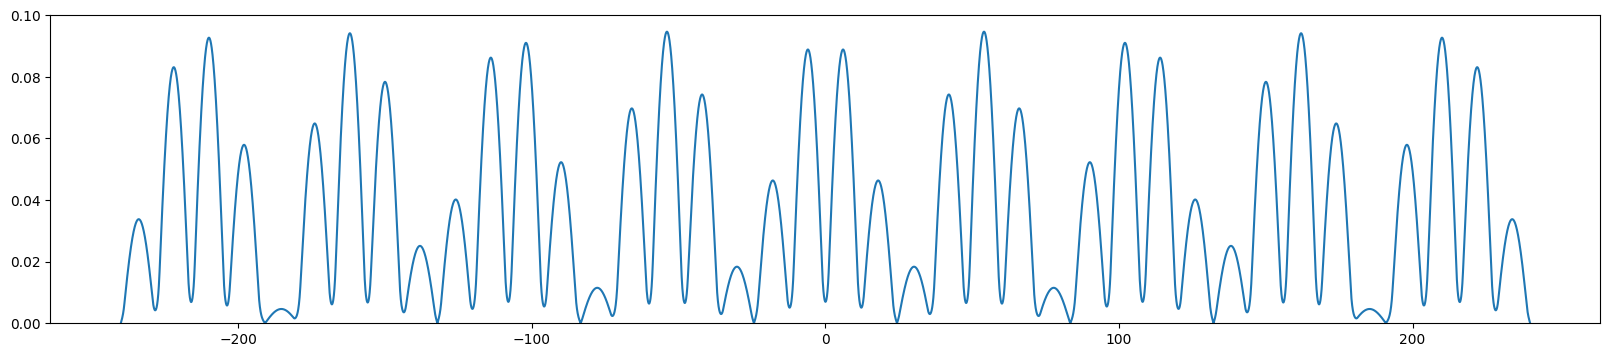

In [ ]:
e1, fg = eigenState(r, ngrid, v1, En1[0], dx)
plt.figure(figsize=(20, 4))
plt.plot(r,abs(fg))
plt.ylim(0,0.1)

In [ ]:
def shift(list_k):
  k_val = np.zeros(len(list_k3))
  for i in range(len(list_k3)):
    l = np.pi/L3
    K = list_k3[i]
    if int(K/l) % 2 == 0:
      K = K - int(K/l)*l
    else:
      K = K - int(K/l)*l
      K = l - K
    k_val[i] = K
  return k_val

k_manual3 = shift(list_k3)

In [ ]:
"""
X1 = np.zeros([450])
X2 = np.zeros([450])
X3 = np.zeros([450])
for i in range(450):
  X1[i] = 0.0002
  X2[i] = 0.0004
  X3[i] = 0.0006
"""

'\nX1 = np.zeros([450])\nX2 = np.zeros([450])\nX3 = np.zeros([450])\nfor i in range(450):\n  X1[i] = 0.0002\n  X2[i] = 0.0004\n  X3[i] = 0.0006\n'

<ipython-input-24-783660659552>:14: RuntimeWarning: divide by zero encountered in divide
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))
<ipython-input-24-783660659552>:14: RuntimeWarning: invalid value encountered in multiply
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))


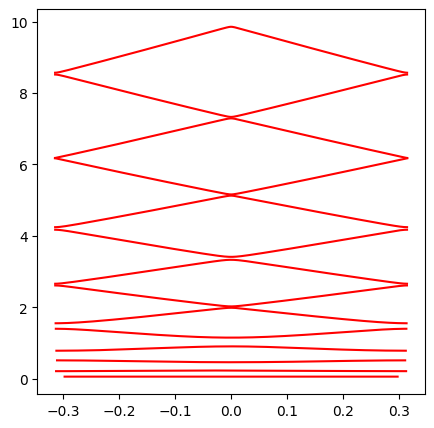

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def KPM_Soln(a,b,U0,eps_range):  #input a, b spacing in Bohr, potential in Hartree, and total desired range to output
    #Constants
    h_bar = 1.0    #Atomic unit (Hartree * second)
    m = 1.0        #Atomic unit (electron rest mass)
    alpha_0 = (2*m*U0/h_bar**2)**(1/2)  #m^-1

    #Kronig-Penny Solution (LHS),  with epsilon = E/U0
    def KPM_p(eps):  #for epsilon > 1
        return (1-2*eps)/(2*(eps*(eps-1))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sin(alpha_0*b*(eps-1)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cos(alpha_0*b*(eps-1)**(1/2))
    def KPM_m(eps):  #for epsilon < 1
        return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))
    def KPM_h(eps): #for epsilon = 1
        return (np.cos(alpha_0*a))-(((b*alpha_0)/2)*np.sin(a*alpha_0))

    #Define epsilon space to plot
    epslist = np.linspace(0,eps_range,200000) ### ini 200k??
    f_eps = np.piecewise(epslist, [epslist < 1, epslist > 1, epslist == 1], [KPM_m, KPM_p, KPM_h])

    return epslist, f_eps

def Eband_KP(epslist,f_eps): #outputs energy band data
    k=[]
    bandlist=[] #for energy values
    Eps=[]
    epsbuildlist=[]
    for i in range(len(f_eps)-1):
       if 1 >= f_eps[i] >= -1: #for conditions inside the range
           bandlist.append(f_eps[i])
           epsbuildlist.append(epslist[i])
           if (1 < f_eps[i+1] or  -1 > f_eps[i+1]): #for k outside the range
               k.append(bandlist) #append bandlist to k list
               Eps.append(epsbuildlist)
               bandlist=[]
               epsbuildlist=[]


    for i in range(len(k)):
        k[i]=np.arccos(k[i])/L1  #inverse to find k value based on appropriate feps value for potential state, divided by pi to adjust the range [-1,1]
        if i % 2 == 0: #why separation for even and odd i values
            Eps[i]=np.concatenate((Eps[i][::-1],Eps[i][::1]))
            k[i]=np.concatenate((-1*np.array(k[i],dtype=float)[::-1],k[i][::1]))
        else:
            k[i]=np.concatenate((k[i][::1],-1*np.array(k[i],dtype=float)[::-1]))
            Eps[i]=np.concatenate((Eps[i][::1],Eps[i][::-1]))

    return k, Eps

#System Variables
a = 8         #in Bohr
b = 2         #still in Bohr
U0 = 1      #Hartree
eps_range = 100/10 #this can be changed

epslist, f_eps = KPM_Soln(a,b,U0,eps_range)
k, eps = Eband_KP(epslist, f_eps)

fig = plt.figure(figsize=(5, 5.0))
plt.plot(k[0],eps[0]*10/eps_range,'-r',label='analytic')

for i in range(1,len(k)):
    plt.plot(k[i],eps[i]*10/eps_range,'-r')


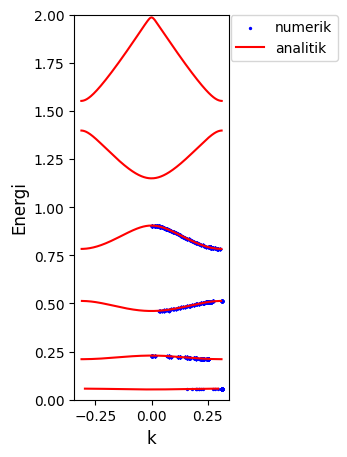

In [ ]:
plt.figure(figsize=(2,5))
plt.scatter(k_manual1, En1, s=2, color='blue', label='numerik')
#plt.scatter(k_manual2, En2, s=2, marker='^', color='orange', label='Terdistorsi')
#plt.plot(k_manual3, En3, marker='*', color='green')
plt.plot(k[0],eps[0]*10/eps_range,'-r',label='analitik')
for i in range(1,len(k)):
    plt.plot(k[i],eps[i]*10/eps_range,'-r')
plt.ylim(0, 2)
#plt.title('Kurva Dispersi dengan Lebar Penghalang 2 a.u')
plt.rcParams['axes.labelsize'] = 12
plt.xlabel('k')
plt.ylabel('Energi')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.show()
#plt.figure(figsize=(15, 10))

<ipython-input-36-6cd9a1289a47>:14: RuntimeWarning: divide by zero encountered in divide
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))
<ipython-input-36-6cd9a1289a47>:14: RuntimeWarning: invalid value encountered in multiply
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))


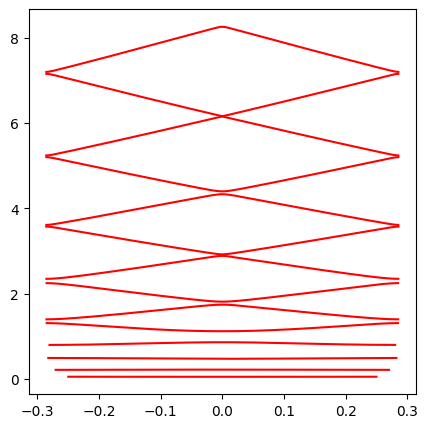

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def KPM_Soln(a,b,U0,eps_range):  #input a, b spacing in Bohr, potential in Hartree, and total desired range to output
    #Constants
    h_bar = 1.0    #Atomic unit (Hartree * second)
    m = 1.0        #Atomic unit (electron rest mass)
    alpha_0 = (2*m*U0/h_bar**2)**(1/2)  #m^-1

    #Kronig-Penny Solution (LHS),  with epsilon = E/U0
    def KPM_p(eps):  #for epsilon > 1
        return (1-2*eps)/(2*(eps*(eps-1))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sin(alpha_0*b*(eps-1)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cos(alpha_0*b*(eps-1)**(1/2))
    def KPM_m(eps):  #for epsilon < 1
        return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))
    def KPM_h(eps): #for epsilon = 1
        return (np.cos(alpha_0*a))-(((b*alpha_0)/2)*np.sin(a*alpha_0))

    #Define epsilon space to plot
    epslist = np.linspace(0,eps_range,200000) ### ini 200k??
    f_eps = np.piecewise(epslist, [epslist < 1, epslist > 1, epslist == 1], [KPM_m, KPM_p, KPM_h])

    return epslist, f_eps

def Eband_KP(epslist,f_eps): #outputs energy band data
    k=[]
    bandlist=[] #for energy values
    Eps=[]
    epsbuildlist=[]
    for i in range(len(f_eps)-1):
       if 1 >= f_eps[i] >= -1: #for conditions inside the range
           bandlist.append(f_eps[i])
           epsbuildlist.append(epslist[i])
           if (1 < f_eps[i+1] or  -1 > f_eps[i+1]): #for k outside the range
               k.append(bandlist) #append bandlist to k list
               Eps.append(epsbuildlist)
               bandlist=[]
               epsbuildlist=[]


    for i in range(len(k)):
        k[i]=np.arccos(k[i])/L2  #inverse to find k value based on appropriate feps value for potential state, divided by pi to adjust the range [-1,1]
        if i % 2 == 0: #why separation for even and odd i values
            Eps[i]=np.concatenate((Eps[i][::-1],Eps[i][::1]))
            k[i]=np.concatenate((-1*np.array(k[i],dtype=float)[::-1],k[i][::1]))
        else:
            k[i]=np.concatenate((k[i][::1],-1*np.array(k[i],dtype=float)[::-1]))
            Eps[i]=np.concatenate((Eps[i][::1],Eps[i][::-1]))

    return k, Eps

#System Variables
a = 8         #in Bohr
b = 3         #still in Bohr
U0 = 1      #Hartree
eps_range = 100/10 #this can be changed

epslist, f_eps = KPM_Soln(a,b,U0,eps_range)
k2, eps2 = Eband_KP(epslist, f_eps)

fig = plt.figure(figsize=(5, 5.0))
plt.plot(k2[0],eps2[0]*10/eps_range,'-r',label='analytic')

for i in range(1,len(k)):
    plt.plot(k2[i],eps2[i]*10/eps_range,'-r')

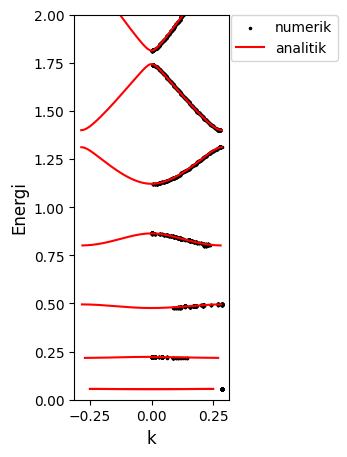

In [ ]:
plt.figure(figsize=(2,5))
#plt.plot(k_manual1, En1, color='yellow', label='a=0,5')
plt.scatter(k_manual2, En2, s=10, marker='.', color='black', label='numerik')
#plt.plot(k_manual3, En3, marker='*', color='green')
plt.plot(k2[0],eps2[0]*10/eps_range,'-r',label='analitik')
for i in range(0,len(k2)):
    plt.plot(k2[i],eps2[i]*10/eps_range,'-r')
plt.ylim(0, 2)
#plt.title('Kurva Dispersi dengan Lebar Penghalang 4 a.u')
plt.rcParams['axes.labelsize'] = 12
plt.xlabel('k')
plt.ylabel('Energi')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.show()
#plt.figure(figsize=(15, 10))

(0.0, 0.2)

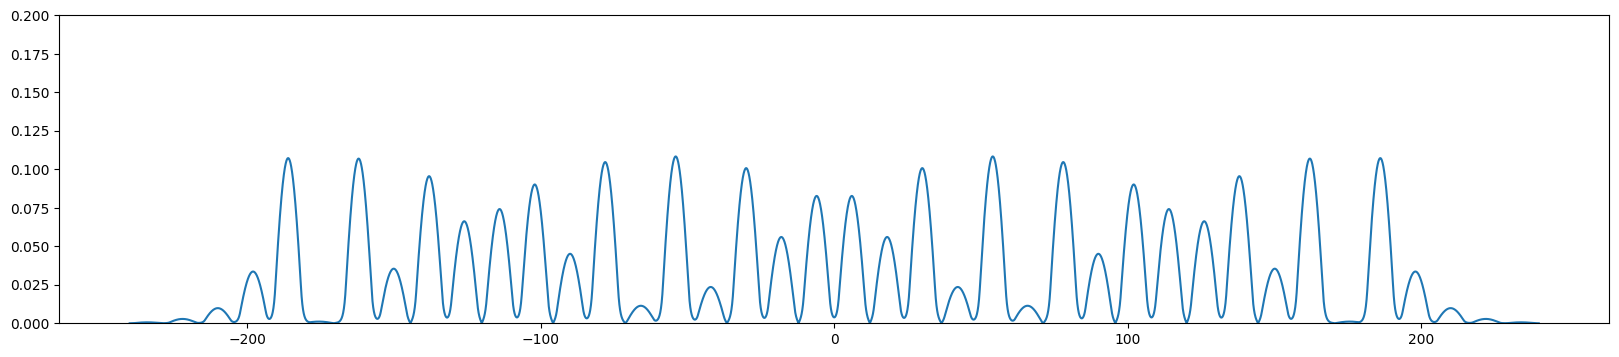

In [ ]:
e1, fg = eigenState(r, ngrid, v2, En2[0], dx)
plt.figure(figsize=(20, 4))
plt.plot(r,abs(fg))
plt.ylim(0,0.2)

(0.0, 0.2)

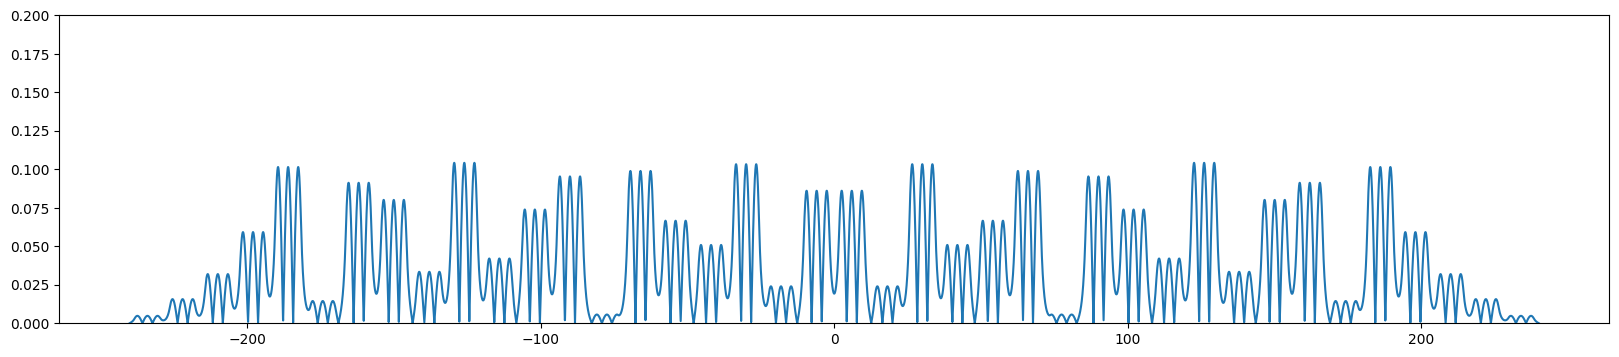

In [ ]:
e1, fg = eigenState(r, ngrid, v2, En2[500], dx)
plt.figure(figsize=(20, 4))
plt.plot(r,abs(fg))
plt.ylim(0,0.2)

(0.0, 0.115)

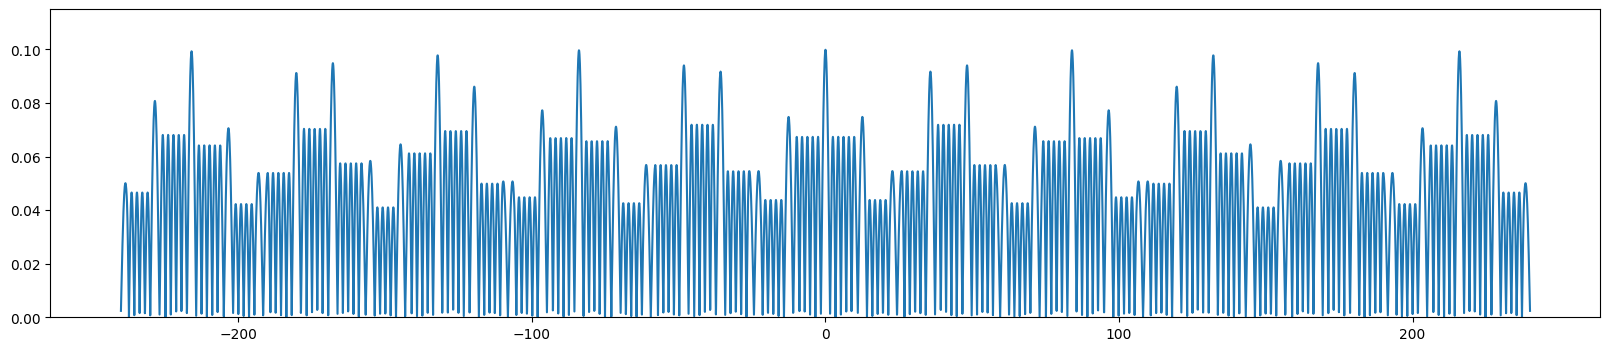

In [ ]:
e1, fg = eigenState(r, ngrid, v3, En3[1500], dx)
plt.figure(figsize=(20, 4))
plt.plot(r,abs(fg))
plt.ylim(0,0.115)

(0.0, 0.2)

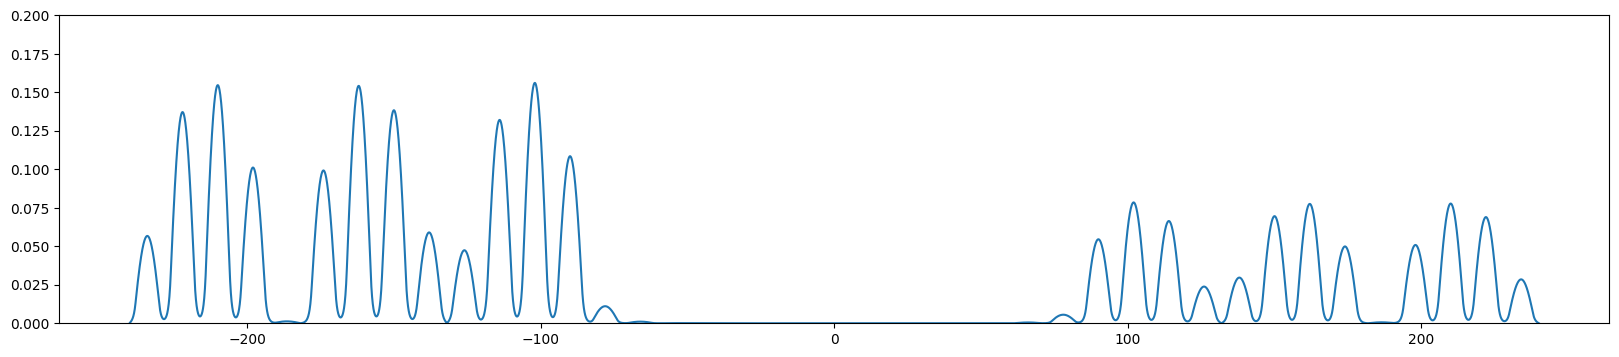

In [ ]:
e1, fg = eigenState(r, ngrid, v3, En3[1], dx)
plt.figure(figsize=(20, 4))
plt.plot(r,abs(fg))
plt.ylim(0,0.2)

<ipython-input-38-e9a09c4a6e27>:14: RuntimeWarning: divide by zero encountered in divide
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))
<ipython-input-38-e9a09c4a6e27>:14: RuntimeWarning: invalid value encountered in multiply
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))


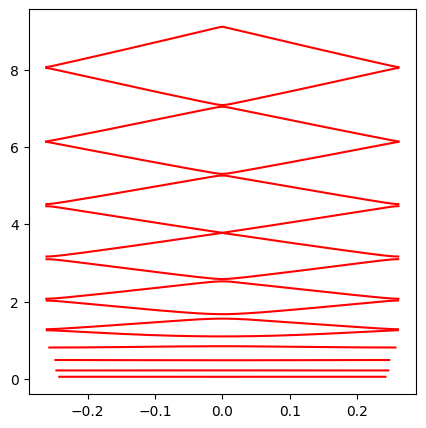

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def KPM_Soln(a,b,U0,eps_range):  #input a, b spacing in Bohr, potential in Hartree, and total desired range to output
    #Constants
    h_bar = 1.0    #Atomic unit (Hartree * second)
    m = 1.0        #Atomic unit (electron rest mass)
    alpha_0 = (2*m*U0/h_bar**2)**(1/2)  #m^-1

    #Kronig-Penny Solution (LHS),  with epsilon = E/U0
    def KPM_p(eps):  #for epsilon > 1
        return (1-2*eps)/(2*(eps*(eps-1))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sin(alpha_0*b*(eps-1)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cos(alpha_0*b*(eps-1)**(1/2))
    def KPM_m(eps):  #for epsilon < 1
        return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))
    def KPM_h(eps): #for epsilon = 1
        return (np.cos(alpha_0*a))-(((b*alpha_0)/2)*np.sin(a*alpha_0))

    #Define epsilon space to plot
    epslist = np.linspace(0,eps_range,200000) ### ini 200k??
    f_eps = np.piecewise(epslist, [epslist < 1, epslist > 1, epslist == 1], [KPM_m, KPM_p, KPM_h])

    return epslist, f_eps

def Eband_KP(epslist,f_eps): #outputs energy band data
    k=[]
    bandlist=[] #for energy values
    Eps=[]
    epsbuildlist=[]
    for i in range(len(f_eps)-1):
       if 1 >= f_eps[i] >= -1: #for conditions inside the range
           bandlist.append(f_eps[i])
           epsbuildlist.append(epslist[i])
           if (1 < f_eps[i+1] or  -1 > f_eps[i+1]): #for k outside the range
               k.append(bandlist) #append bandlist to k list
               Eps.append(epsbuildlist)
               bandlist=[]
               epsbuildlist=[]


    for i in range(len(k)):
        k[i]=np.arccos(k[i])/L3  #inverse to find k value based on appropriate feps value for potential state, divided by pi to adjust the range [-1,1]
        if i % 2 == 0: #why separation for even and odd i values
            Eps[i]=np.concatenate((Eps[i][::-1],Eps[i][::1]))
            k[i]=np.concatenate((-1*np.array(k[i],dtype=float)[::-1],k[i][::1]))
        else:
            k[i]=np.concatenate((k[i][::1],-1*np.array(k[i],dtype=float)[::-1]))
            Eps[i]=np.concatenate((Eps[i][::1],Eps[i][::-1]))

    return k, Eps

#System Variables
a = 8         #in Bohr
b = 4         #still in Bohr
U0 = 1      #Hartree
eps_range = 100/10 #this can be changed

epslist, f_eps = KPM_Soln(a,b,U0,eps_range)
k, eps = Eband_KP(epslist, f_eps)

fig = plt.figure(figsize=(5, 5.0))
plt.plot(k[0],eps[0]*10/eps_range,'-r',label='analytic')

for i in range(1,len(k)):
    plt.plot(k[i],eps[i]*10/eps_range,'-r')

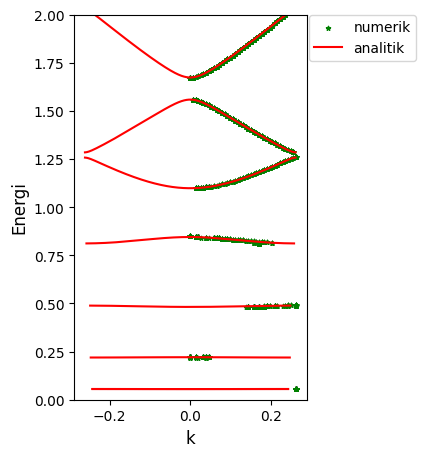

In [ ]:
plt.figure(figsize=(3,5))
#plt.plot(k_manual1, En1, color='yellow', label='a=0,5')
#plt.scatter(k_manual2, En2, s=2, marker='^', color='orange', label='Terdistorsi')
plt.scatter(k_manual3, En3, s=10, marker='*', color='green', label='numerik')
plt.plot(k[0],eps[0]*10/eps_range,'-r',label='analitik')
for i in range(0,len(k)):
    plt.plot(k[i],eps[i]*10/eps_range,'-r')
plt.ylim(0, 2)
#plt.title('Kurva Dispersi dengan Lebar Penghalang 6 a.u')
plt.rcParams['axes.labelsize'] = 12
plt.xlabel('k')
plt.ylabel('Energi')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.show()
#plt.figure(figsize=(15, 10))

In [ ]:
'''
plt.scatter(list_k1, En1, s=5, color='red', label='a=0,5')
plt.scatter(list_k2, En2, s=5, marker='^', color='orange')
plt.scatter(list_k3, En3, s=5, marker='*', color='green')
plt.scatter(k[i],eps[i]*10/eps_range, s=5, marker='*', color='black')
#plt.ylim(0, 0.5)
plt.title('Variasi Besar Distorsi Medan Listrik dengan Penghalang Sebesar 3 a.u')
plt.xlabel('Medan Listrik')
plt.ylabel('Energi')
#plt.figure(figsize=(15, 10))
'''

"\nplt.scatter(list_k1, En1, s=5, color='red', label='a=0,5')\nplt.scatter(list_k2, En2, s=5, marker='^', color='orange')\nplt.scatter(list_k3, En3, s=5, marker='*', color='green')\nplt.scatter(k[i],eps[i]*10/eps_range, s=5, marker='*', color='black')\n#plt.ylim(0, 0.5)\nplt.title('Variasi Besar Distorsi Medan Listrik dengan Penghalang Sebesar 3 a.u')\nplt.xlabel('Medan Listrik')\nplt.ylabel('Energi')\n#plt.figure(figsize=(15, 10))\n"

In [ ]:
#En1

In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt

def KPM_Soln(a,b,U0,eps_range):  #input a, b spacing in Bohr, potential in Hartree, and total desired range to output
    #Constants
    h_bar = 1.0    #Atomic unit (Hartree * second)
    m = 1.0        #Atomic unit (electron rest mass)
    alpha_0 = (2*m*U0/h_bar**2)**(1/2)  #m^-1

    #Kronig-Penny Solution (LHS),  with epsilon = E/U0
    def KPM_p(eps):  #for epsilon > 1
        return (1-2*eps)/(2*(eps*(eps-1))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sin(alpha_0*b*(eps-1)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cos(alpha_0*b*(eps-1)**(1/2))
    def KPM_m(eps):  #for epsilon < 1
        return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))
    def KPM_h(eps): #for epsilon = 1
        return (np.cos(alpha_0*a))-(((b*alpha_0)/2)*np.sin(a*alpha_0))

    #Define epsilon space to plot
    epslist = np.linspace(0,eps_range,200000) ### ini 200k??
    f_eps = np.piecewise(epslist, [epslist < 1, epslist > 1, epslist == 1], [KPM_m, KPM_p, KPM_h])

    return epslist, f_eps

def Eband_KP(epslist,f_eps): #outputs energy band data
    k=[]
    bandlist=[] #for energy values
    Eps=[]
    epsbuildlist=[]
    for i in range(len(f_eps)-1):
       if 1 >= f_eps[i] >= -1: #for conditions inside the range
           bandlist.append(f_eps[i])
           epsbuildlist.append(epslist[i])
           if (1 < f_eps[i+1] or  -1 > f_eps[i+1]): #for k outside the range
               k.append(bandlist) #append bandlist to k list
               Eps.append(epsbuildlist)
               bandlist=[]
               epsbuildlist=[]


    for i in range(len(k)):
        k[i]=np.arccos(k[i])/L  #inverse to find k value based on appropriate feps value for potential state, divided by pi to adjust the range [-1,1]
        if i % 2 == 0: #why separation for even and odd i values
            Eps[i]=np.concatenate((Eps[i][::-1],Eps[i][::1]))
            k[i]=np.concatenate((-1*np.array(k[i],dtype=float)[::-1],k[i][::1]))
        else:
            k[i]=np.concatenate((k[i][::1],-1*np.array(k[i],dtype=float)[::-1]))
            Eps[i]=np.concatenate((Eps[i][::1],Eps[i][::-1]))

    return k, Eps

#System Variables
a = 3         #in Bohr
b = 1         #still in Bohr
U0 = 0.3      #Hartree
eps_range = 100/3 #this can be changed

epslist, f_eps = KPM_Soln(a,b,U0,eps_range)
k, eps = Eband_KP(epslist, f_eps)

fig = plt.figure(figsize=(5, 5.0))
plt.plot(k[0],eps[0]*10/eps_range,'-r',label='analytic')
for i in range(1,len(k)):
    plt.plot(k[i],eps[i]*10/eps_range,'-r')
#plt.plot(jpp,es,'d',markersize=4,label='numerik')
plt.scatter(k_manual,En, s=6, marker='o',color='b',label='numerik')
plt.xlabel('k')
plt.ylabel('Energy')
plt.ylim(0,1)
#plt.xlim(-0.7,0.7)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.show()
'''

"\nimport numpy as np\nimport matplotlib.pyplot as plt\n\ndef KPM_Soln(a,b,U0,eps_range):  #input a, b spacing in Bohr, potential in Hartree, and total desired range to output\n    #Constants\n    h_bar = 1.0    #Atomic unit (Hartree * second)\n    m = 1.0        #Atomic unit (electron rest mass)\n    alpha_0 = (2*m*U0/h_bar**2)**(1/2)  #m^-1\n\n    #Kronig-Penny Solution (LHS),  with epsilon = E/U0\n    def KPM_p(eps):  #for epsilon > 1\n        return (1-2*eps)/(2*(eps*(eps-1))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sin(alpha_0*b*(eps-1)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cos(alpha_0*b*(eps-1)**(1/2))\n    def KPM_m(eps):  #for epsilon < 1\n        return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*eps**(1/2))*np.sinh(alpha_0*b*(1-eps)**(1/2))+np.cos(alpha_0*a*eps**(1/2))*np.cosh(alpha_0*b*(1-eps)**(1/2))\n    def KPM_h(eps): #for epsilon = 1\n        return (np.cos(alpha_0*a))-(((b*alpha_0)/2)*np.sin(a*alpha_0))\n\n    #Define epsilon space to plot\n    epslist = np.li